In [50]:
import pandas as pd
import numpy as np
from services import validate, prepareWordDF
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [51]:
df = prepareWordDF()

In [52]:
def filteredSearch(df, constraints, guess):
    cols = []
    for col in np.arange(5):
        cols.append(f"c{col}")
    filtered = df
    searchList = {}
    for idx, constrain in enumerate(list(constraints)):
        
        if(constrain=="2"):
            filtered = filtered[filtered.eq(guess[idx]).any(1)]
            filtered = filtered[filtered[f"c{idx}"]!=guess[idx]]
        if(constrain=="1"):
            filtered = filtered[filtered[f"c{idx}"]==guess[idx]]
        if(constrain=="0"):
            if(guess[idx] not in searchList):
                filtered = filtered[filtered.eq(guess[idx]).any(1) == False]
            else:
                filtered = filtered[filtered[f"c{idx}"]!=guess[idx]]
        searchList[guess[idx]] = guess[idx]
    return filtered.reset_index()[cols]

In [53]:
cases = filteredSearch(df, fb, guess)

NameError: name 'fb' is not defined

In [ ]:
cases

In [ ]:
np.log2(1/(cases/df.shape[0]))

In [4]:
def xMap(guess, df):
    fbMap = {}
    for _, row in df.iterrows():
        word = "".join(row)
        _, fb = validate(word, guess)
        if(fb in fbMap):
            fbMap[fb] +=1
        else:
            fbMap[fb] = 1
    return fbMap

In [5]:
def getxG(guess, df):
    fbMap = xMap(guess, df)
    x = 0
    for info in fbMap:
        p = fbMap[info]/df.shape[0]
        x += p* - np.log2(p)
    return x

In [ ]:
pd.DataFrame(columns=["word", "xG"]).append({"word": "abc", "xG": 12.4}, ignore_index = True)

In [6]:
def getBestWords(df):
    xGBoard = pd.DataFrame(columns=["word", "xG"])
    
    for idx, row in df.iterrows():
#         clear_output(wait = True)
#         print(f"{idx+1}/{df.shape[0]}")
        word = "".join(row)
        xG = getxG(word, df)
        xGBoard = xGBoard.append({"word": word, "xG": xG}, ignore_index = True)
    return xGBoard

In [ ]:
xGBoard = getBestWords(df)

In [ ]:
xGBoard.sort_values(by="xG", ascending=False)

In [49]:
xGBoard.to_csv("xGTable.csv")

NameError: name 'xGBoard' is not defined

In [ ]:
xGBoard.sort_values(by="xG", ascending=False).iloc[0]["word"]

In [7]:
def infoTheorySolver(df, word):
    xGBoard = pd.read_csv("xGTable.csv")
    guesses = 0
    isDone = False
    while(isDone == False):
        guess = xGBoard.sort_values(by="xG", ascending=False).iloc[0]["word"]
        print(guess)
        isDone, fb = validate(word, guess)
        df = filteredSearch(df, fb, guess)
        xGBoard = getBestWords(df)
        guesses +=1
    return guesses

In [8]:
infoTheorySolver(df, "ferry")

raise
tenor
belch
jerky
ferry


5

In [ ]:
guesses = []
for game in range(1):
    for idx, word in enumerate(words):
        print(f"{idx+1}/{len(words)}", end="\r")
        guesses.append(infoTheorySolver(df, word.strip()))

In [17]:
guesses2 = []
for idx, row in df.iterrows():
    word = "".join(row)
    clear_output(wait=True)
    print(f"{idx+1}/{df.shape[0]}")
    guesses2.append(infoTheorySolver(df, word.strip()))

2316/2316
raise
float
local
modal
zonal


In [38]:
import matplotlib as mpl
mpl.rc("figure", dpi=256)

In [40]:
np.sum(np.array(guesses2)<6)/len(guesses2)

[3,
 3,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 4,
 4,
 5,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 2,
 2,
 3,
 4,
 2,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 2,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 3,
 4,
 5,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 4,
 3,
 2,
 4,
 4,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 6,
 3,
 4,
 4,
 3,
 4,
 3,
 3,
 2,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 2,
 4,
 3,
 2,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 3,
 4,
 3,
 3,
 4,
 2,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 2,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 3,
 5,
 4,
 6,
 4,
 4,


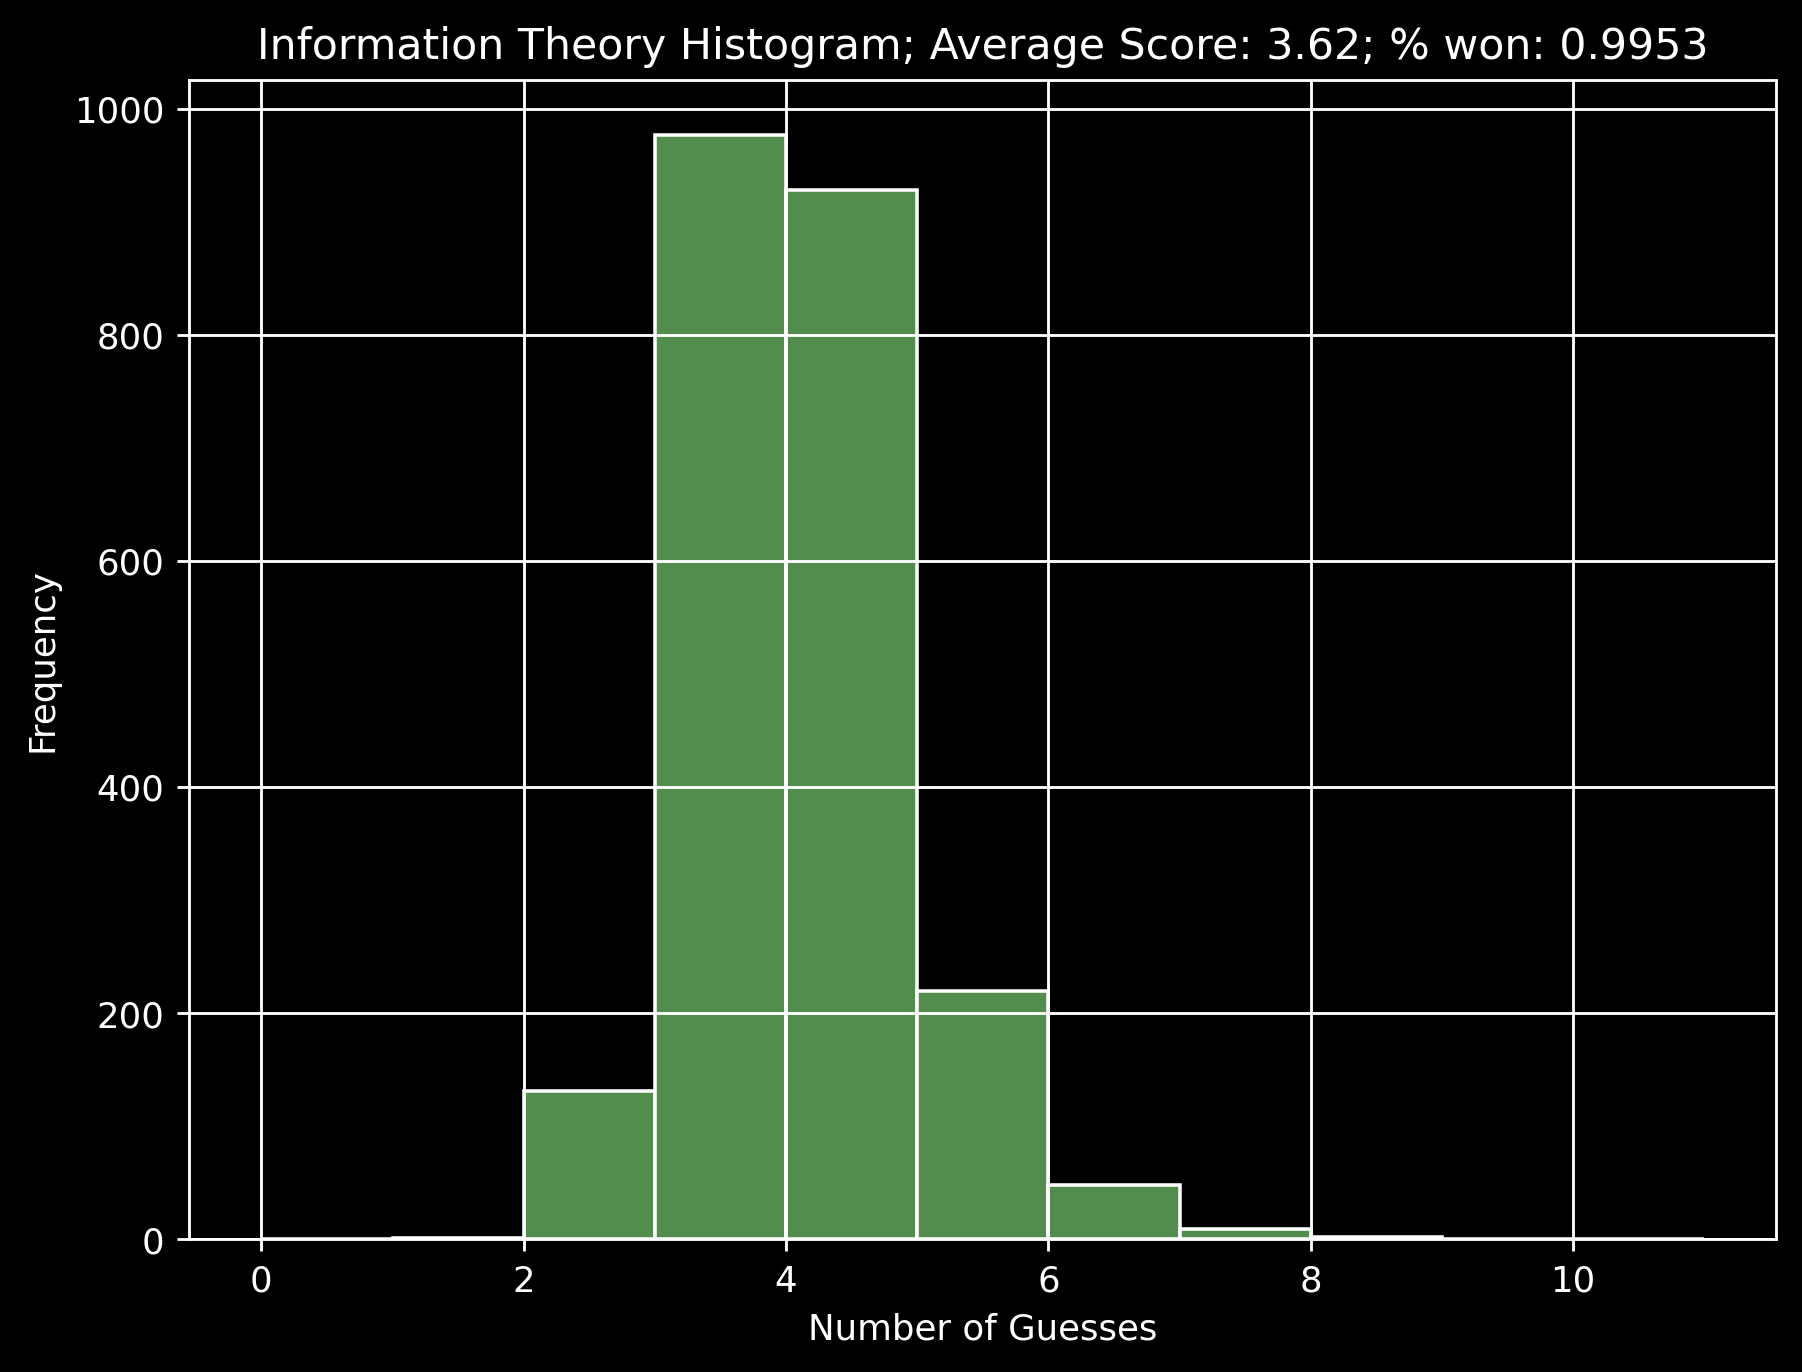

In [43]:
plt.style.use("dark_background")
plt.figure(figsize=(8, 6))
plt.hist(guesses2, bins=np.arange(12), color="#538d4e", edgecolor="white")
plt.xlabel("Number of Guesses")
plt.ylabel("Frequency")
plt.grid()
plt.title(f"Information Theory Histogram; Average Score: {np.average(guesses2):.2f}; % won: {np.sum(np.array(guesses2)<=6)/len(guesses2):.4f}")
plt.savefig("info_theory_histogram.jpg")

In [21]:
np.average(guesses2)

3.615284974093264

In [44]:
import time

In [47]:
xGMap

NameError: name 'xGMap' is not defined

In [46]:
time.sleep(4)

In [48]:
xGBoard

NameError: name 'xGBoard' is not defined